In [1]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
from dataclasses import dataclass
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## base de la regresion 

In [6]:
# Supongamos que tus datos son algo como esto:
# X es tu serie de tiempo y y son los valores que quieres predecir
X = np.array(range(1, 101)).reshape(-1, 1)
y = np.array([i*2 + np.random.normal(0, 10) for i in range(1, 101)])
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creamos el modelo de regresión lineal
regressor = LinearRegression()  

# Entrenamos el modelo usando los datos de entrenamiento
regressor.fit(X_train, y_train)

# Hacemos predicciones en los datos de prueba
y_pred = regressor.predict(X_test)

# Evaluamos el modelo
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.960421964118754
Mean Squared Error: 109.58871929828793
Root Mean Squared Error: 10.468463081956584


## Resample de tiempo a diario

In [ ]:
import pandas as pd

# Supongamos que 'df' es tu DataFrame y que 'time' es tu columna de tiempo
df['time'] = pd.to_datetime(df['time'])

# Re-muestrear a un intervalo diario, utilizando la media para agregar
df_resampled = df.resample('D', on='time').mean()

# Interpolar los valores faltantes
df_resampled = df_resampled.interpolate()


# TestV0

In [2]:
df = pd.read_csv(r'D:\Prepa\TIME.S\Prepa_TS.csv')
df['TIME'] = pd.to_datetime(df['TIME'],format='%d-%m-%Y')
df = df[['TIME','MES-COMPROMISO','PEND_FACT_SOLES']]
meses = ['Abril','Mayo']
df[df['MES-COMPROMISO'].isin(meses)]

,TIME,MES-COMPROMISO,PEND_FACT_SOLES
0,2024-03-01,Abril,23690.44
1,2024-03-01,Abril,48329.55
2,2024-03-01,Abril,32926.63
3,2024-03-01,Abril,4704.00
4,2024-03-01,Abril,25409.73
...,...,...,...
4237,2024-04-04,Mayo,44233.30
4238,2024-04-04,Mayo,65614.39
4239,2024-04-04,Mayo,32924.62
4240,2024-04-04,Mayo,29184.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TIME             4242 non-null   datetime64[ns]
 1   MES-COMPROMISO   4242 non-null   object        
 2   PEND_FACT_SOLES  4242 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 99.6+ KB


In [4]:

def days_at_tstar(df:pd.DataFrame,columna):
    fecha_inicio = df[columna].min()
    # Transforma cada fecha en el número de días desde la fecha de inicio
    df['dias_desde_inicio'] = (df[columna] - fecha_inicio).dt.days
    df.drop(columns=[columna],inplace=True)
    return df

## Con dataclases : 

In [79]:
@dataclass
class MesDataFrames:
    def __init__(self, list_meses):
        for mes in list_meses:
            setattr(self, mes, pd.DataFrame())
@dataclass
class MesdfTimeSeries:
    def __init__(self, list_meses):
        for mes in list_meses:
            setattr(self, mes, pd.DataFrame())
mes_dfs = MesDataFrames(meses)
TS_dfs = MesdfTimeSeries(meses)
for mes in meses:
    setattr(mes_dfs, mes, df[df['MES-COMPROMISO'] == mes])
    setattr(TS_dfs, mes, df.groupby(['TIME','MES-COMPROMISO']).sum())


AttributeError: 'MesdfTimeSeries' object has no attribute 'reset_index'

In [73]:
TS_dfs.Abril = TS_dfs.Abril.reset_index().drop(columns=['MES-COMPROMISO'])
TS_dfs.Mayo = TS_dfs.Mayo.reset_index().drop(columns=['MES-COMPROMISO'])

In [74]:
TS_dfs.Mayo

,TIME,PEND_FACT_SOLES
0,2024-02-19,5288292.51
1,2024-02-21,5115676.18
2,2024-02-22,5115676.18
3,2024-02-23,5115676.18
4,2024-02-26,4771576.53
5,2024-02-28,4771576.53
6,2024-02-29,4579061.15
7,2024-03-01,4579061.15
8,2024-03-04,4579061.15
9,2024-03-05,4579061.15


## Con diccionarios: 

In [8]:
dfs = {}
dfTSs = {}
df_resampled = {}
for mes in meses:
    # Usa el mes como clave del diccionario
    dfs[mes] = df[df['MES-COMPROMISO'] == mes]
    dfTSs[mes] = dfs[mes].groupby(['TIME','MES-COMPROMISO']).sum().reset_index() ## Agrupo por intancias de tiempo
    dfTSs[mes].drop(columns='MES-COMPROMISO',inplace=True) ## Elimino columna que no necesito
    df_resampled[mes] = dfTSs[mes].resample('D', on='TIME').mean()### Hago resample para tener intervalos constantes
    df_resampled[mes] = df_resampled[mes].interpolate().reset_index()# Interpolo para completar esos intervalos
    df_resampled[mes] = days_at_tstar(df_resampled[mes],'TIME')## Discretiso las instancias de tiempo



## Prueba estadistica de normalidad 

Shapiro test statistic: 0.9007464051246643, p-value: 0.0011473109479993582


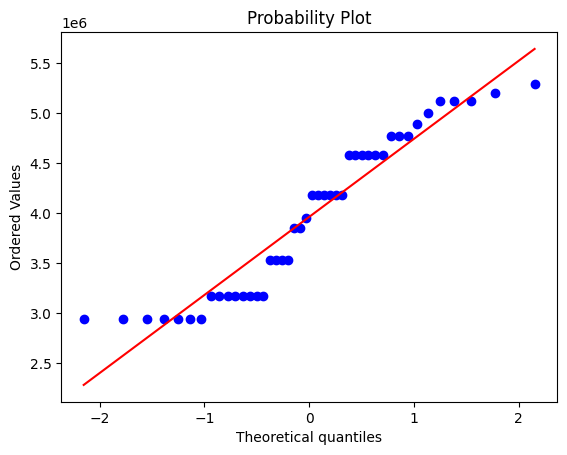

In [124]:


# Supongamos que 'data' son tus datos
data = df_resampled['Abril'].drop(columns=['TIME'])['PEND_FACT_SOLES'].tolist()

# Realiza una prueba de normalidad (p.ej., Shapiro-Wilk)
shapiro_test = stats.shapiro(data)
print(f"Shapiro test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Si el valor p es mayor que 0.05, entonces los datos no se desvían significativamente de una distribución normal

# Crea un gráfico Q-Q
plt.figure()
stats.probplot(data, plot=plt)
plt.show()

## RobustScaler

In [126]:
from sklearn.preprocessing import RobustScaler

# Supongamos que 'y' es tu variable dependiente
y = df_resampled['Abril'].drop(columns=['TIME'])['PEND_FACT_SOLES'].tolist()
y = np.array(y)
scaler = RobustScaler()
y_robust_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Ahora 'y_robust_scaled' está normalizado de manera robusta


## MinMaxScaler (Mas apropiado hasta ahora para las series de tiempo)

In [165]:
#Este tiene menor error que el robust scaler
# Supongamos que 'y' es tu variable dependiente
y = df_resampled['Abril'].drop(columns=['TIME'])['PEND_FACT_SOLES'].tolist()
y = np.array(y)
scaler = MinMaxScaler()
y_normalized = scaler.fit_transform(y.reshape(-1, 1))

# Ahora 'y_normalized' está normalizado al rango de 0 a 1


## Linear regresion aplicado

In [170]:
# Supongamos que tus datos son algo como esto:
# X es tu serie de tiempo y y son los valores que quieres predecir
eje_x = df_resampled['Abril'].drop(columns=['TIME'])['Dias_desde_inicio'].tolist()
X = np.array(eje_x).reshape(-1, 1) ## la redimencion ,se utiliza para cumplir el requerimiento de skt-learn en los imputs
y = np.array(y_normalized)
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creamos el modelo de regresión lineal
regressor = LinearRegression()  

# Entrenamos el modelo usando los datos de entrenamiento
regressor.fit(X_train, y_train)

# Hacemos predicciones en los datos de prueba
y_pred = regressor.predict(X_test)

# Evaluamos el modelo
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Graficar los datos de prueba
plt.scatter(X_test, y_test, color='gray')

# Graficar las predicciones del modelo
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()
"""En este gráfico, los puntos grises representan tus datos de prueba y la línea roja representa las predicciones de tu modelo de regresión lineal."""

Mean Absolute Error: 0.05300434264992777
Mean Squared Error: 0.004153253589397333
Root Mean Squared Error: 0.0644457414372535


## Para estimar interseccion con el eje X

In [337]:
y_original = scaler.inverse_transform(Y_a)
y_original

array([[0.00447155]])

In [283]:
Y_a = regressor.predict(np.array(88.2976877).reshape(-1,1))

m = regressor.coef_[0]
b = regressor.intercept_

print(f"La pendiente (m) de la línea es {m}")
print(f"La intersección con el eje y (b) es {b}")
print(f"La interseccion con el eje x es : {-b/m}")
print(f"Faltan {(float_cero-b)/m - len(y_normalized)} dias para finalizar")
print(f"Faltan {((float_cero-b)/m - len(y_normalized))/7} semanas para terminar el compromismo de Abril")

La pendiente (m) de la línea es [-0.02539479]
La intersección con el eje y (b) es [0.99000718]
La interseccion con el eje x es : [38.98466147]
Faltan [44.29768777] dias para finalizar
Faltan [6.32824111] semanas para terminar el compromismo de Abril


In [276]:
cero = scaler.transform(np.array(0).reshape(-1,1))
float_cero = float(cero[0][0].astype(float))
float_cero

Faltan [6.32824111] semanas para terminar el compromismo de Abril
